In [1]:
# import numpy as np  
# from numpy import linalg
# from matplotlib import pyplot as plt
# import seaborn as sns; sns.set()
# %matplotlib inline
from metodos import *

In [2]:
def gera_u(U, M, N):
    u = np.zeros((M+1, N+1))
    for j in range(1, M):
        for i in range(1, N):
            u[j][i] = U[(i-1)*(N-1) + j-1][0]
    return u

10
[[-4.  1.  0. ...  0.  0.  0.]
 [ 1. -4.  1. ...  0.  0.  0.]
 [ 0.  1. -4. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -4.  1.  0.]
 [ 0.  0.  0. ...  1. -4.  1.]
 [ 0.  0.  0. ...  0.  1. -4.]]


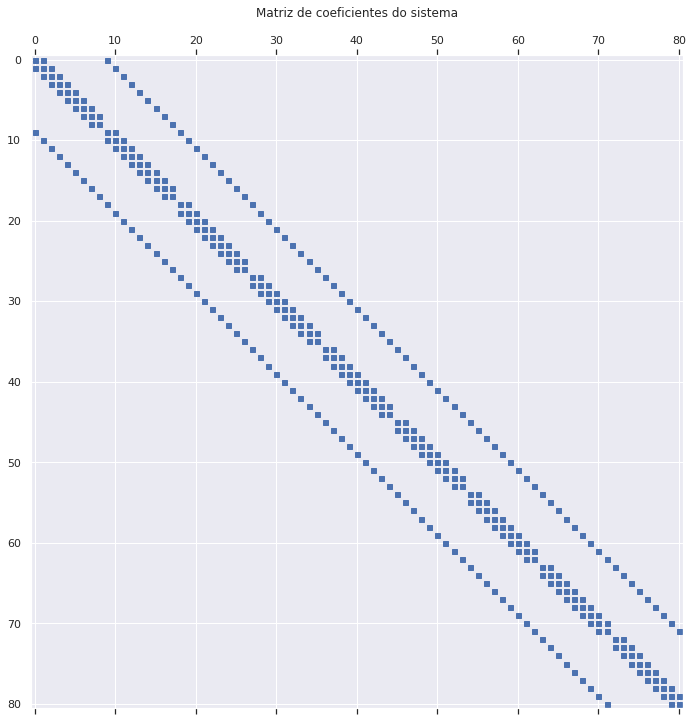

In [3]:



a = -4
b = 1
c = 1
ini = -1
b = 1

h = k = 0.2
M = N = 10

# h = k = 0.1
# M = N = 20

# h = k = 0.05
# M = N = 40

print(M)
# np.diag(a*np.ones((N-1)*(M-1)), k=0)
A = np.zeros(((N-1) * (M-1), (N-1) * (M-1)))
ii = 0
for i in range(1, N):
    for j in range(1, M):
        if i+1 != N:
            A[ii][((i)*(N-1)) + j-1] = 1
        if i-1 != 0:
            A[ii][((i-2)*(N-1)) + j-1] = 1
        A[ii][(i-1)*(N-1) + j-1] = a
        if j+1 != M:
            A[ii][((i-1)*(N-1)) + j] = 1
        if j-1 != 0:
            A[ii][((i-1)*(N-1)) + j - 2] = 1
        ii += 1
print(A)
plt.figure(figsize=(12,12))
plt.title("Matriz de coeficientes do sistema")
plt.spy(A, markersize = 5) 
plt.show()

In [4]:
U = np.zeros(((N-1) * (M-1),1))
# print(U)
r = (-2*h**2)*np.ones(((N-1) * (M-1), 1))
# print(r)
D = np.diag(np.diag(A))
S = np.triu(A, k=1)
L = np.tril(A, k=-1)

In [5]:
print("Jacobi")
Ur, ite, error, tempo = gauss_seidel(S, D, L, r, U, 1e-6, 10000)
# print_tabela(Ur, M, N)
print(Ur)

Jacobi
[[0.10250453]
 [0.16500911]
 [0.20317647]
 [0.22399473]
 [0.23062566]
 [0.2239948 ]
 [0.20317658]
 [0.16500923]
 [0.10250462]
 [0.16500911]
 [0.2743556 ]
 [0.34370221]
 [0.382177  ]
 [0.39451331]
 [0.38217712]
 [0.34370241]
 [0.27435582]
 [0.16500927]
 [0.20317647]
 [0.34370221]
 [0.43510005]
 [0.48649805]
 [0.50307373]
 [0.4864982 ]
 [0.43510031]
 [0.34370249]
 [0.20317667]
 [0.22399473]
 [0.382177  ]
 [0.48649805]
 [0.54564178]
 [0.5647857 ]
 [0.54564195]
 [0.48649834]
 [0.38217732]
 [0.22399495]
 [0.23062566]
 [0.39451331]
 [0.50307373]
 [0.5647857 ]
 [0.5847857 ]
 [0.56478587]
 [0.50307402]
 [0.39451362]
 [0.23062588]
 [0.2239948 ]
 [0.38217712]
 [0.4864982 ]
 [0.54564195]
 [0.56478587]
 [0.54564211]
 [0.48649847]
 [0.3821774 ]
 [0.223995  ]
 [0.20317658]
 [0.34370241]
 [0.43510031]
 [0.48649834]
 [0.50307402]
 [0.48649847]
 [0.43510052]
 [0.34370264]
 [0.20317674]
 [0.16500923]
 [0.27435582]
 [0.34370249]
 [0.38217732]
 [0.39451362]
 [0.3821774 ]
 [0.34370264]
 [0.27435598]

In [6]:
res = gera_u(Ur, M, N)
# print(res.round(2))
print(res.shape)
print(tempo)
print(ite)

(11, 11)
0.034818172454833984
128


[-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0]


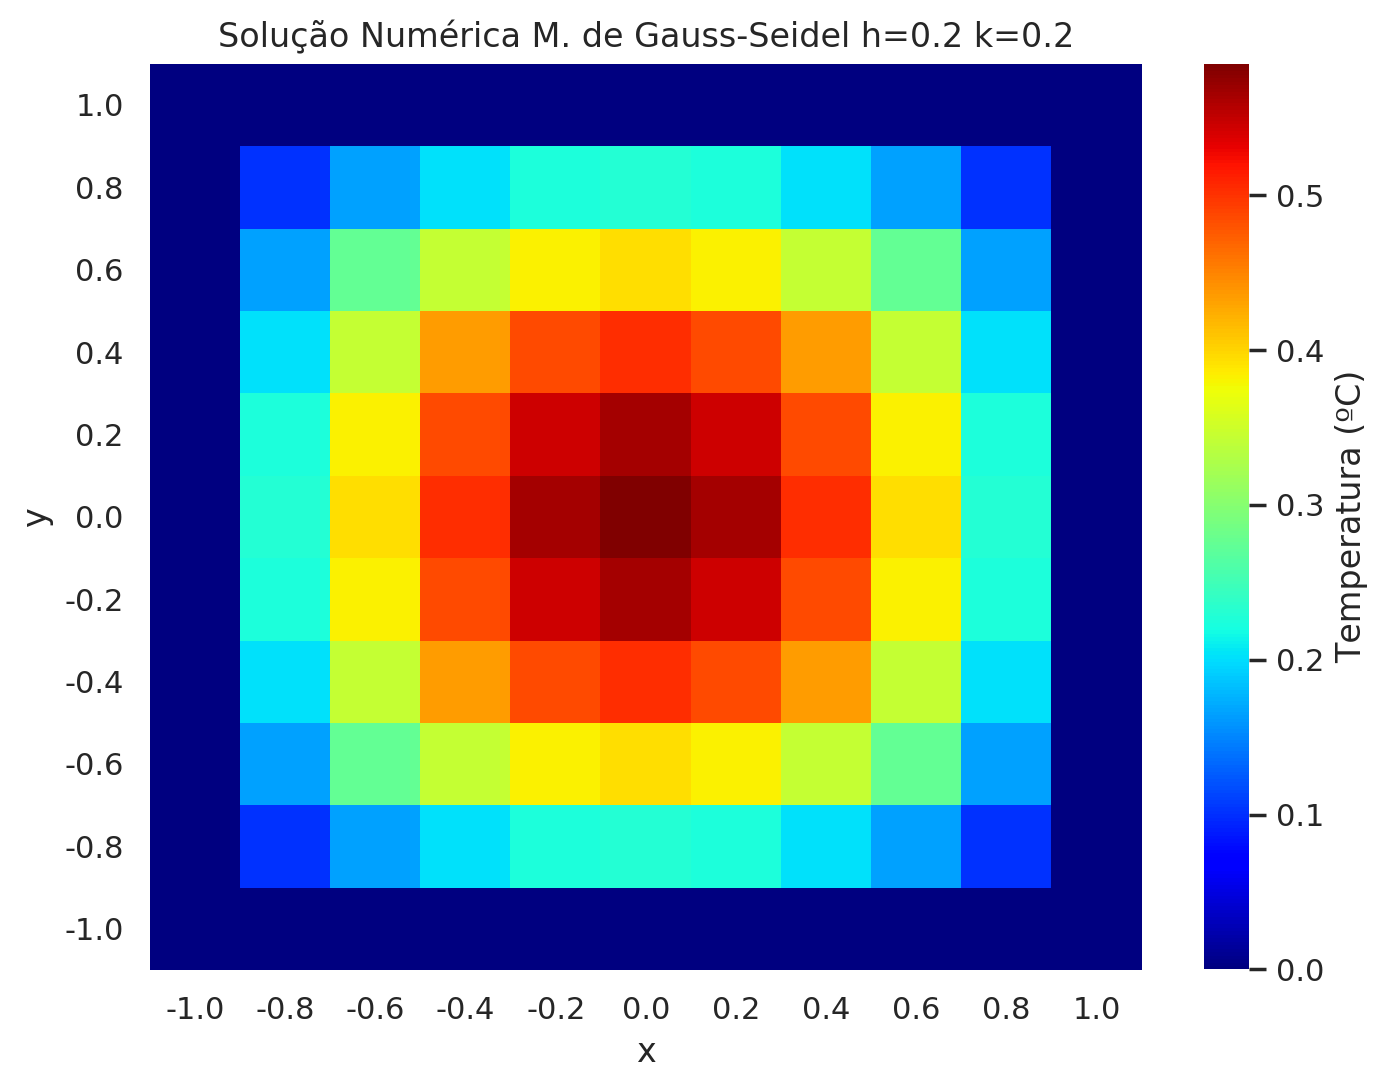

In [7]:
def gera_ticks(l, ini, end):
    ticks = ["" for x in range(l)]
    elementos = np.linspace(ini, end, int((end-ini)/0.2 + 1))
    # print(len(elementos))
    # print(len(ticks))
    # print(ticks)
    # print(elementos)
    ii = 0
    for i in range(l):
        if i % int(np.around(len(ticks)/len(elementos))) == 0:
            if ii >= len(elementos):
                break
            ticks[i] = elementos[ii].round(2)
            ii +=1
    # print(ticks)
    return ticks

def print_res(u, M, N, i, a, b, h, k, metodo="", print_annot=False, title=False):
    x_ticks = gera_ticks(int((a-i)/h + 1), i, a)
    y_ticks = gera_ticks(int((a-i)/k + 1), i, b)
#     y_ticks = np.linspace(i, b, int((b-i)/k + 1)).round(2)
    # x_ticks = np.linspace(i, a, int((a-i)/0.2 + 1)).round(2)
#     y_ticks = np.linspace(i, b, int((b-i)/0.2 + 1)).round(2)
    print(x_ticks)
    if not(title):
        title = 'Solução Numérica '+ metodo + ' h=' + str(h) + ' k=' + str(k)
    else:
        title = metodo + ' h=' + str(h) + ' k=' + str(k)

    plt.figure(dpi=200, figsize=(8, 6))
    plt.title(title)
    if print_annot:
        text = [ [ None for y in range( N+1 ) ] for x in range( M+1 ) ]
        for i in range(N+1):
            for j in range(M+1):
             text[i][j] = "U{},{}".format(i, j)
    else:
        text = False
    ax = sns.heatmap(u, cmap='jet', annot=text, fmt ='', xticklabels =1, yticklabels =1,cbar_kws={'label': 'Temperatura (ºC)'})
    ax.set_xticklabels(x_ticks)
    ax.set_yticklabels(y_ticks)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    plt.yticks(rotation=0)
    plt.xticks(rotation=0)
    ax.invert_yaxis()
    plt.show()

print_res(res, M, N, -1, 1, 1, h, k, metodo="M. de Gauss-Seidel", print_annot=False)

In [8]:
def soma(x, y):
    s = 0
    for n in range(0, 101):
        s+=(((-1)**n)/(2*n+1)**3) * (1/np.cosh(((2*n+1)*np.pi)/2))*np.cosh(((2*n+1)*np.pi*x)/2)*np.cos(((2*n+1)*np.pi*y)/2)
    return s

def sol_analitica(ini, a, b, h, k, M, N):
    u = np.zeros((M+1, N+1))
    x = np.linspace(ini, a, int((a-ini)/h)+1)
    y = np.linspace(ini, b, int((b-ini)/k)+1)
    print(x)
    for i in range(len(x)):
        for j in range(len(y)):
#             print(x[i], y[j])
            u[i, j] = 1 - y[j]**2 - (32/np.pi**3) * soma(x[i], y[j])
    return u    

u = sol_analitica(-1, 1, 1, h, k, M, N)

[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]


[-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0]


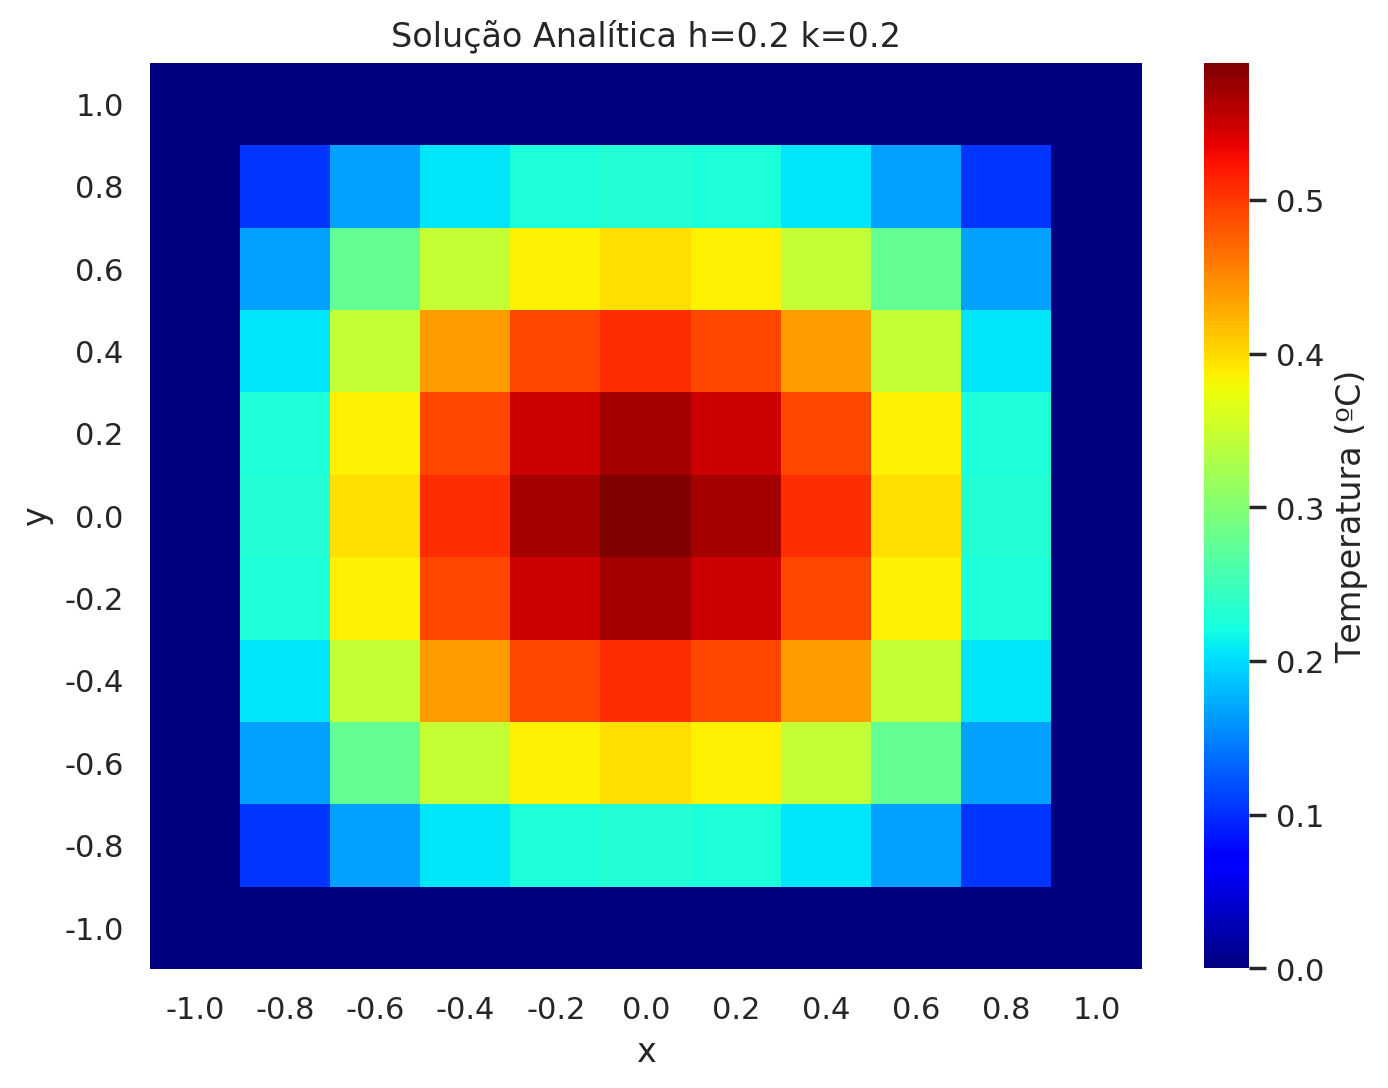

In [9]:
u.shape
print_res(u, M, N, -1, 1, 1, h, k, metodo="Solução Analítica", print_annot=False, title=True)

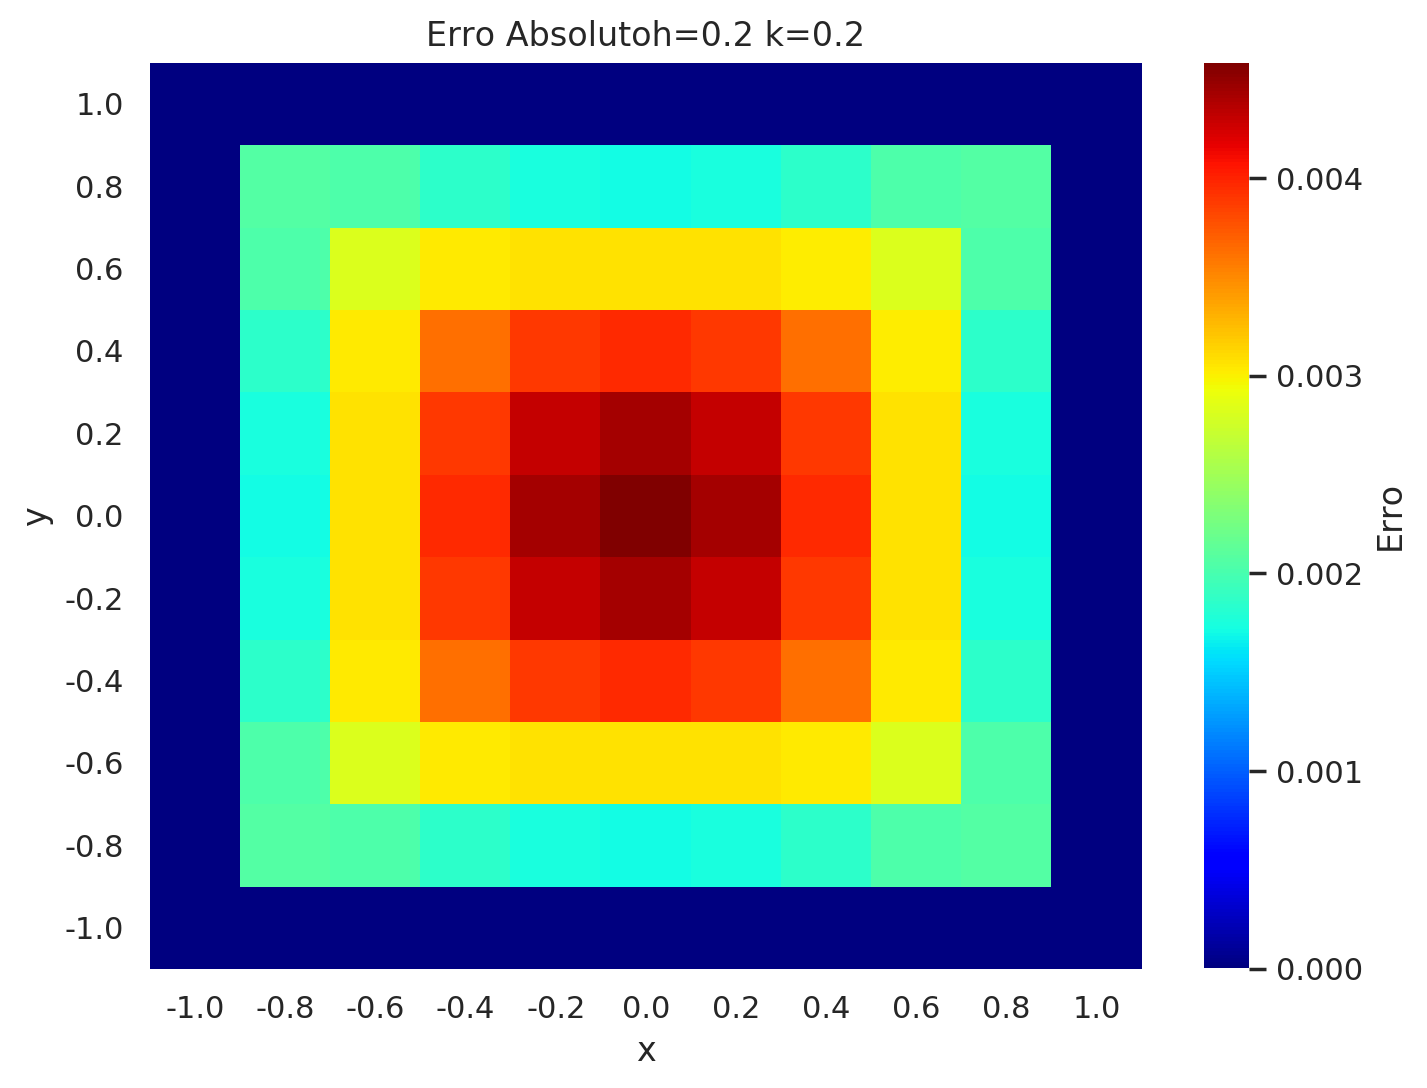

In [10]:
erro = np.absolute(u-res)


x_ticks = gera_ticks(int((2)/h + 1), -1, 1)
y_ticks = gera_ticks(int((2)/k + 1), -1, 1)
title = 'Erro Absoluto' + 'h=' + str(h) + ' k=' + str(k)

plt.figure(dpi=200, figsize=(8, 6))
plt.title(title)
ax = sns.heatmap(erro, cmap='jet', xticklabels =1, yticklabels =1,cbar_kws={'label': 'Erro'})

ax.set_xticklabels(x_ticks)
ax.set_yticklabels(y_ticks)
ax.set_xlabel("x")
ax.set_ylabel("y")

plt.yticks(rotation=0)
plt.xticks(rotation=0)

ax.invert_yaxis()
plt.show()

In [14]:
for i in range(1,5):
    for j in range(1,4):
        print("(i="+str(i)+", j="+str(j)+") \quad U_{"+str(i+1)+","+str(j)+"} + U_{"+str(i-1)+","+str(j)+"} -4U_{"+str(i)+","+str(j)+"} + U_{"+str(i)+","+str(j-1)+"} + U_{"+str(i)+","+str(j+1)+"} = 0\\\\")

(i=1, j=1) \quad U_{2,1} + U_{0,1} -4U_{1,1} + U_{1,0} + U_{1,2} = 0\\
(i=1, j=2) \quad U_{2,2} + U_{0,2} -4U_{1,2} + U_{1,1} + U_{1,3} = 0\\
(i=1, j=3) \quad U_{2,3} + U_{0,3} -4U_{1,3} + U_{1,2} + U_{1,4} = 0\\
(i=2, j=1) \quad U_{3,1} + U_{1,1} -4U_{2,1} + U_{2,0} + U_{2,2} = 0\\
(i=2, j=2) \quad U_{3,2} + U_{1,2} -4U_{2,2} + U_{2,1} + U_{2,3} = 0\\
(i=2, j=3) \quad U_{3,3} + U_{1,3} -4U_{2,3} + U_{2,2} + U_{2,4} = 0\\
(i=3, j=1) \quad U_{4,1} + U_{2,1} -4U_{3,1} + U_{3,0} + U_{3,2} = 0\\
(i=3, j=2) \quad U_{4,2} + U_{2,2} -4U_{3,2} + U_{3,1} + U_{3,3} = 0\\
(i=3, j=3) \quad U_{4,3} + U_{2,3} -4U_{3,3} + U_{3,2} + U_{3,4} = 0\\
(i=4, j=1) \quad U_{5,1} + U_{3,1} -4U_{4,1} + U_{4,0} + U_{4,2} = 0\\
(i=4, j=2) \quad U_{5,2} + U_{3,2} -4U_{4,2} + U_{4,1} + U_{4,3} = 0\\
(i=4, j=3) \quad U_{5,3} + U_{3,3} -4U_{4,3} + U_{4,2} + U_{4,4} = 0\\
